# Project:  2020 Stack Overflow Developer Survey Results Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#crisp">Business and Data Understanding (CRISP-DM)</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents.

<ul>
<li>survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer</li>
<li>survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name</li>
<li>This data set contains information about 65,000 developers, how they learn and level up, which tools they’re using, and what they want.</li>
<li>Information ranging from technologies and behavior to questions that will help improve the Stack Overflow community for everybody who codes.</li>
<li>There is a slight increase in female-gendered respondents, while non-binary, genderqueer, or non-conforming remained the same.</li>
</ul>


### Question(s) for Analysis
<ul>
<li>What are the most wanted languages for next year 2021 ?</li>
<li>How is total compensation (USD) correlate to developer type ?</li>
<li>Which country has the highest average total compensation (USD) ?</li> 
<li>How well can we predict an individual's age ? What aspects correlate well to age ?</li>
</ul>

### A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this project, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython import display
from collections import defaultdict
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data, check for cleanliness, and then trim and clean dataset for analysis.


### General Properties

In [4]:
# Load data

df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### Data Cleaning

In [5]:
df.shape

(64461, 61)

>There are total 64461 movies and 61 columns.

>Now take a look at the summary statistics associated with the quantitative variables in dataset. It shows continuous variables in dataset.

In [6]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


>So from above, we can see that :

>1) 'Respondent' column just listing an index for each row.

>2) The maximum Age on the scales for the survey is 279.

>3) 'ConvertedComp' column has the most missing values.

>4) The variable 'WorkWeekHrs' has the highest spread of values.

>Let's see if there are some missing rows or not.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

>So from above, it is clear that almost every column has some missing values.

>Let's look at histogram of whole dataset.

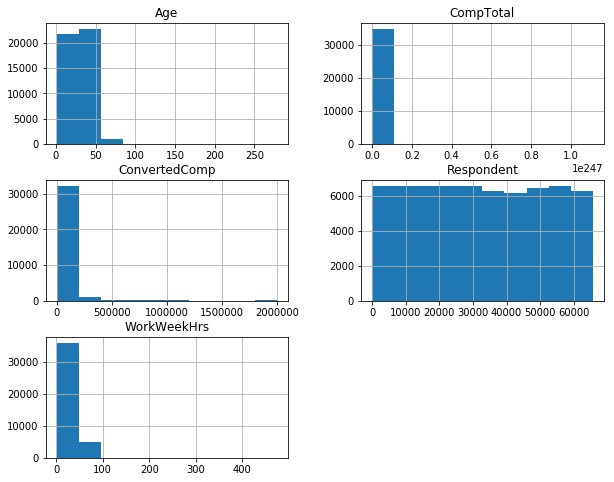

In [8]:
df.hist(figsize=(10, 8));

>1) Features : **Age**, **CompTotal**, **ConvertedComp**, **WorkWeekHrs** : are all skewed to the right

>2) Majority of Age is less than 80.

>3) Majority of ConvertedComp is less than 500000 USD. 

>4) Majority of WorkWeekHrs is less than 100. 

>Plot a correlation matrix - this tell which variables are related to one another.

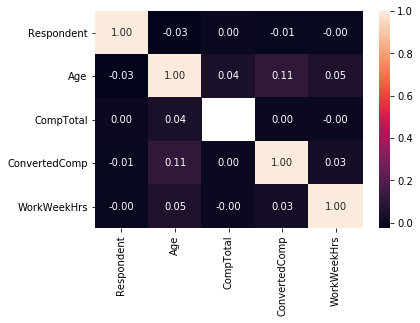

In [9]:
sb.heatmap(df.corr(), annot=True, fmt='.2f');

>1) 'ConvertedComp' column has the strongest correlation with Age. 

>2) The data does not suggests that more hours worked relates to higher age.

>3) Data in the CompTotal column meant missing data in one other columns.

>4) The strongest negative relationship had -0.03 correlation.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What are the most wanted languages for next year 2021 ?

>In order to understand that which language is most in demand for next year, we will look at the **LanguageDesireNextYear** field. We will use the **schema** dataset to answer this question.  We will write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

In [44]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

Use **get_description** function below to take a closer look at the **LanguageDesireNextYear** column.

In [22]:
get_description('LanguageDesireNextYear')

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

Provide a pandas series of the different **LanguageDesireNextYear** status values in the dataset.  Store this pandas series in **languageNextYear**.

In [11]:
languageNextYear = df['LanguageDesireNextYear'].value_counts().reset_index()
languageNextYear.head()

,index,LanguageDesireNextYear
0,Python,1152
1,Rust,528
2,HTML/CSS;JavaScript;TypeScript,499
3,C#,461
4,Go,412


It looks terrible, and we get no information from it. There are more than one answer in some rows. We definitely need to clean this !  Above is an example of what happens when we do not clean our data. Below I am using code to take a look at the data after it has been cleaned.

In [12]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name we want to look through
    col2 - the column we want to count values from
    look_for - a list of strings we want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of programming types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the programming type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [13]:
possible_vals = ["Assembly", "Bash/Shell/PowerShell", "C", "C#", "C++", "Dart", "Go", "Haskell", "HTML/CSS", "Java",
                 "JavaScript", "Julia", "Kotlin", "Objective-C", "Perl", "PHP", "Python", "R", "Ruby", "Rust", "Scala", "SQL",
                 "Swift", "TypeScript", "VBA", "Other"]

Language = df['LanguageDesireNextYear'].value_counts().reset_index()
Language.rename(columns={'index': 'Programming_Language', 'LanguageDesireNextYear': 'count'}, inplace=True)
Language_df = total_count(Language, 'Programming_Language', 'count', possible_vals)
Language_df['Percentage'] = Language_df['count']/np.sum(Language_df['count'])
Language_df.head()

,Programming_Language,count,Percentage
2,C,33645,0.113427
9,Java,31671,0.106772
16,Python,26682,0.089953
10,JavaScript,26188,0.088287
8,HTML/CSS,20771,0.070025


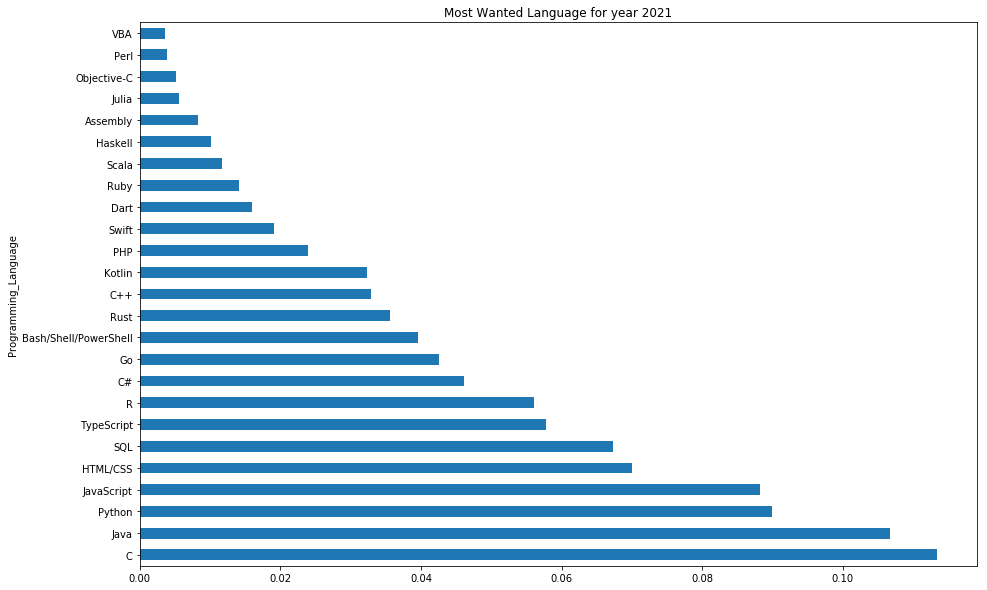

In [24]:
def clean_and_plot(df, title='Most Wanted Language for year 2021', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LanguageDesireNextYear column
        title - string the title of plot
        axis - axis object
        plot - bool providing whether or not we want a plot back
        
    OUTPUT
        Language_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the LanguageDesireNextYear column.
    '''
    Language = df['LanguageDesireNextYear'].value_counts().reset_index()
    Language.rename(columns={'index': 'Programming_Language', 'LanguageDesireNextYear': 'count'}, inplace=True)
    Language_df = total_count(Language, 'Programming_Language', 'count', possible_vals)

    Language_df.set_index('Programming_Language', inplace=True)
    if plot:
        (Language_df/Language_df.sum()).plot(kind='barh', legend=None, figsize=(15, 10));
        plt.title(title);
        plt.show()
    props_Language_df = Language_df/Language_df.sum()
    return props_Language_df
    
props_df = clean_and_plot(df)

>From above, we can conclude following :

>If we look at technologies that developers report that they do not use but want to learn **C** takes the top spot for the next year. We also see some modest gains in the interest in learning Python.

### Research Question 2 : How is total compensation (USD) correlate to developer type ?

Select only that rows where Develeper type is not null.

In [25]:
developerType_df = df[df['DevType'].isnull()==False]
developerType_df.shape

(49370, 61)

From this, select only rows where compensation is not null.

In [26]:
developerType_df = developerType_df[developerType_df['ConvertedComp'].isnull()==False]
developerType_df.shape

(34367, 61)

In [28]:
developerType_df['DevType'].value_counts().reset_index()

,index,DevType
0,"Developer, full-stack",3162
1,"Developer, back-end",2208
2,"Developer, back-end;Developer, front-end;Devel...",1664
3,"Developer, back-end;Developer, full-stack",1135
4,"Developer, front-end",906
5,"Developer, mobile",839
6,"Developer, front-end;Developer, full-stack",655
7,"Developer, back-end;Developer, desktop or ente...",613
8,"Developer, back-end;Developer, desktop or ente...",488
9,"Developer, back-end;Developer, front-end;Devel...",438


It looks terrible, and we get no information from it. There are more than one answer in some rows. We definitely need to clean this !

Make a dataframe df2 which contains information only about Converted compensation and Developer type.

In [29]:
data = [developerType_df['ConvertedComp'], developerType_df['DevType']]

headers = ['ConvertedComp', 'DevType']

df2 = pd.concat(data, axis=1, keys=headers)

df2.head()

,ConvertedComp,DevType
7,116000.0,"Developer, back-end;Developer, desktop or ente..."
9,32315.0,"Database administrator;Developer, full-stack;D..."
10,40070.0,"Developer, back-end;Developer, desktop or ente..."
11,14268.0,"Designer;Developer, front-end"
12,38916.0,"Designer;Developer, back-end"


In [91]:
df2.shape

(34367, 2)

In [30]:
# List of all possible values for developer type.

possible_vals_developer = ["Academic researcher", "Data or business analyst", "Data scientist or machine learning specialist",
                           "Database administrator", "Designer", "Developer, back-end", "Developer, desktop or enterprise applications",
                           "Developer, embedded applications or devices", "Developer, front-end", "Developer, full-stack",
                           "Developer, game or graphics", "Developer, mobile", "Developer, QA or test", "DevOps specialist",
                           "Educator", "Engineer, data", "Engineer, site reliability", "Engineering manager", "Marketing or sales professional",
                           "Product manager", "Scientist", "Senior executive/VP", "System administrator"]

In [38]:
new_df1 = defaultdict(float)

# loop through list of developer types
for possible_val_developer in possible_vals_developer:
    
    # if developer type match then save it as a dataframe
    df3 = df2[df2['DevType'] == possible_val_developer]
    
    # find mean of all total compensation 
    calculateMean = df3.ConvertedComp.mean()
    
    new_df1[possible_val_developer] += float(calculateMean)

new_df1 = pd.DataFrame(pd.Series(new_df1)).reset_index()
new_df1.columns = ['Developer_type', 'Total_compensation_mean']
new_df1.sort_values('Total_compensation_mean', ascending=False, inplace=True)
new_df1.head()

,Developer_type,Total_compensation_mean
19,Product manager,294223.233333
20,Scientist,203354.613636
21,Senior executive/VP,183875.960000
17,Engineering manager,169185.201835
16,"Engineer, site reliability",147153.314286


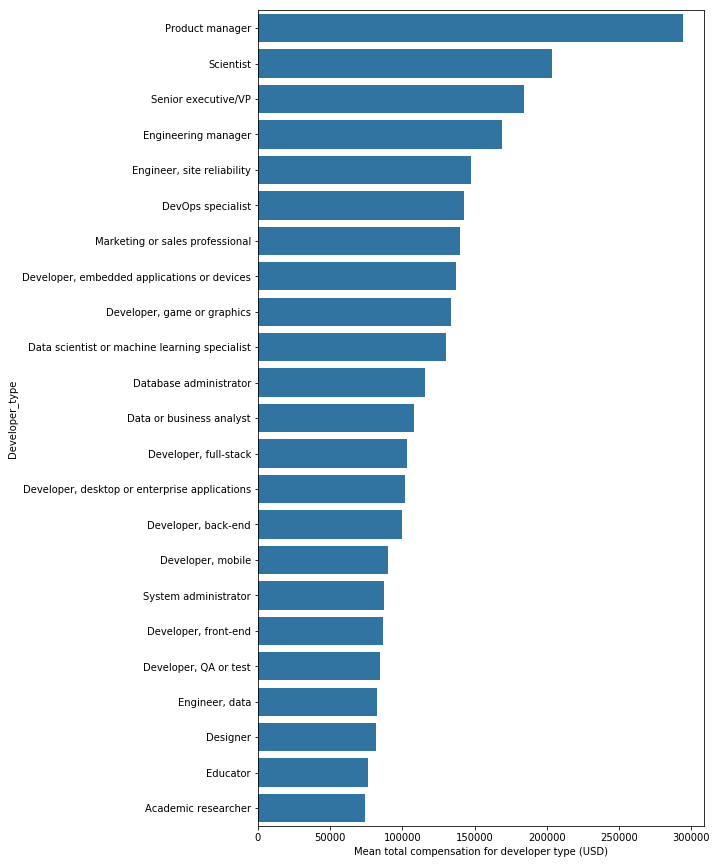

In [37]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 15]);
sb.barplot(data = new_df1, x = 'Total_compensation_mean', y = 'Developer_type', color = base_color, ci = 'sd');
plt.xlabel('Mean total compensation for developer type (USD)');

>From above, we can conclude following :

>Across the board of global developer population, Product manager, Scientist and Senior executive tend to receive the highest total compensation (USD) relative to other occupations.

>Educator and Academic researcher tend to receive the lowest total compensation (USD) relative to other occupations.

### Research Question 3 : According to Country, which country type has the highest average total compensation (USD) ?

The proportion of missing values in the Converted Compensation column :

In [3]:
df['ConvertedComp'].isnull().mean() # missing values

0.46082127177673321

In [39]:
countryCompensation = df.groupby(['Country']).mean()['ConvertedComp'].sort_values(ascending=False)

countryCompensation_df = pd.DataFrame(pd.Series(countryCompensation)).reset_index()
countryCompensation_df.columns = ['Country_type', 'Total_compensation_mean']
countryCompensation_df.head()

,Country_type,Total_compensation_mean
0,Nomadic,310924.142857
1,Lao People's Democratic Republic,231275.250000
2,United States,208826.496443
3,Ireland,183000.740351
4,Afghanistan,148290.125000


In [40]:
# Drop only the rows with missing values in column Compensation_mean.

countryCompensation_df = countryCompensation_df.dropna(subset=['Total_compensation_mean'], how='any')

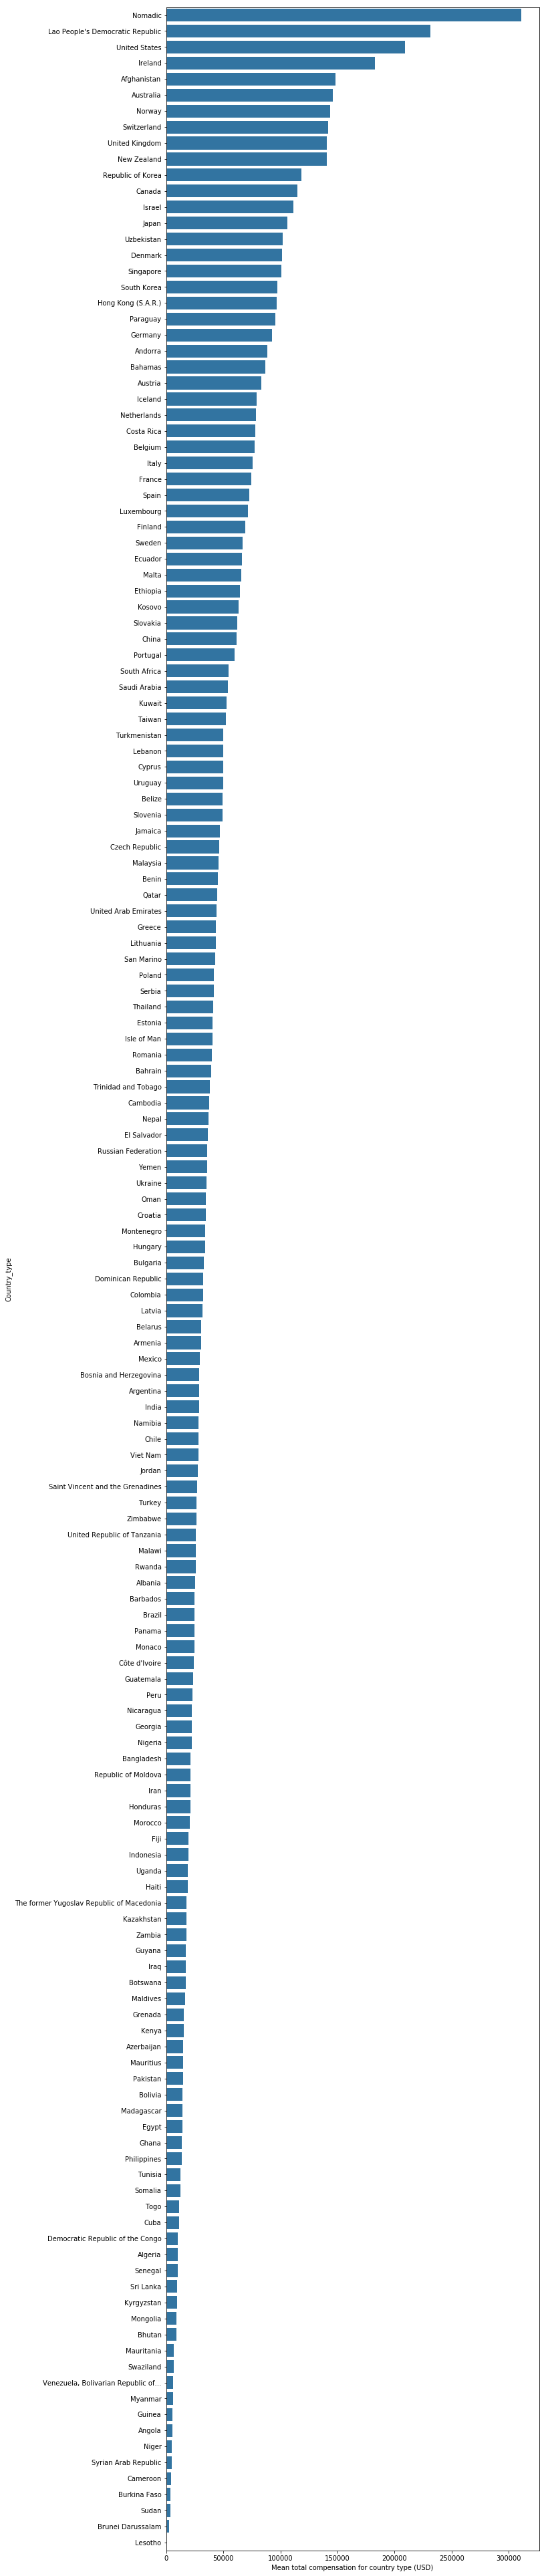

In [41]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 70]);
sb.barplot(data = countryCompensation_df, x = 'Total_compensation_mean', y = 'Country_type', color = base_color, ci = 'sd');
plt.xlabel('Mean total compensation for country type (USD)');

>From above, we can conclude following :

>According to list of countries, developer in country Nomadic tend to receive the highest total compensation (USD) relative to other countries.

>Developer in country Lesotho tend to receive the lowest total compensation (USD) relative to other countries.

### Research Question 4 : How well can we predict an individual's age ? What aspects correlate well to age ?

>We will need to use a predictive model. 

>For this question regarding what are related to relationships of variables with age - this question will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

In [44]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['Age', 'ConvertedComp', 'WorkWeekHrs']]

#Drop the rows with missing age
drop_sal_df = num_vars.dropna(subset=['Age'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['ConvertedComp', 'WorkWeekHrs']]
y = fill_df['Age']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.006368202673704748 on 13634 values.'

Now we will use Categorical variables to see if we can improve our model.

In [3]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe
cat_df.shape[1]

56

56 columns are considered categorical.

In [4]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [5]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'Age', cat_cols_lst, dummy_na=False)

In [6]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.953395918659742.  The rsquared on the test data was -2.8335187867456427e+24.


The rsquared value on the training data is higher than it is on the test data.
This is likely due to overfitting!!!

In [16]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Age'], axis=0)
    y = df['Age']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'Age', 'CompFreq', 'CompTotal', 'Country', 'CurrencyDesc',
                  'CurrencySymbol', 'DatabaseDesireNextYear', 'Employment', 'Ethnicity', 'Gender',
                  'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'MiscTechDesireNextYear',
                  'NEWCollabToolsDesireNextYear', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHuntResearch',
                  'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWPurchaseResearch', 'NEWPurpleLink',
                  'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PurchaseWhat',
                  'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
                  'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WelcomeChange', 'WebframeWorkedWith',
                  'PlatformWorkedWith', 'NEWCollabToolsWorkedWith', 'MiscTechWorkedWith', 'LanguageWorkedWith',
                  'DatabaseWorkedWith', 'Age1stCode', 'Hobbyist', 'MainBranch'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)

In [19]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

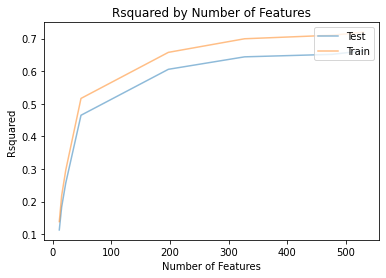

In [20]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [21]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

530
0.6625248372303536
0.7195066277841


The optimal number of features based on the results is 530.
The model we should implement in practice has a train rsquared of 0.72
The model we should implement in practice has a test rsquared of 0.66

The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty. Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the age. The larger the coefficient, the larger the expected impact on age.

In [22]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
489,YearsCode_More than 50 years,38.318104,38.318104
483,YearsCode_50,28.056799,28.056799
480,YearsCode_46,25.253424,25.253424
481,YearsCode_48,25.247533,25.247533
479,YearsCode_45,25.222913,25.222913
478,YearsCode_44,20.342464,20.342464
477,YearsCode_43,19.687919,19.687919
476,YearsCode_42,18.450418,18.450418
475,YearsCode_41,16.953171,16.953171
474,YearsCode_40,15.477044,15.477044


>From above, we can conclude following :

>YearsCode appears to be one of the top indicators for age. 

>YearsCodePro appears to be one of the indicators for age.

>How long an individual has been programming appears to be one of the top indicators for age.

>YearsCode and YearsCodePro both seem to have a significant impact on the age of individuals.

<a id='conclusions'></a>
## Conclusions

>Findings and the results related to the age : it can be predicted based on variables : **YearsCode and YearsCodePro**. It means including any education, how many years have individual been coding in total can be used to predict age. And not including education, how many years have individual coded professionally (as a part of his/her work) can also be used to predict age.

> Findings and the results related to the most wanted language for next year 2021 : **C, Python, Java** are the top 3 choices for most of the individuals.

> Findings and the results related to the countries where individual received highest total compensation (USD) : **Nomadic, United States, Laos** are the top 3 choices for most of the individuals.

> Findings and the results related to the job position where individual received highest total compensation (USD) : **Product manager, Scientist, Senior executive** are the top 3 choices for most of the individuals.

<a id='crisp'></a>
# Business and Data Understanding (CRISP-DM)


## Business Questions

1. What are the most wanted languages for next year 2021 ?
2. How is total compensation (USD) correlate to developer type ?
3. Which country has the highest average total compensation (USD) ?
4. How well can we predict an individual's age ? What aspects correlate well to age ?


## Data Understanding

Here we used the stackoverflow data to attempt to answer our questions of interest. We did 1., 2. and 3. in tandem in this case, using the data to help us arrive at our questions of interest. This is one of two methods that is common in practice. The second method that is common is to have certain questions you are interested in answering, and then having to collect data related to those questions.


## Prepare Data

Luckily stackoverflow has already collected the data for us. However, we still need to wrangle the data in a way for us to answer our questions. This is commonly denoted as 80% of the process. When attempting to build a model to predict age, and there was still much more we could have done. From working with missing data to finding a way to work with categorical variables, and we didn't even look for outliers or attempt to find points we were especially poor at predicting. There was ton more we could have done to wrangle the data.


## Model Data

We were finally able to model the data, but we had some back and forth with step 3. before we were able to build a model that had okay performance. There still may be changes that could be done to improve the model we have in place. From additional feature engineering to choosing a more advanced modeling technique, we did little to test that other approaches were better.


## Results

Results are the findings from our wrangling and modeling.

1. Age can be predicted based on variables : **YearsCode and YearsCodePro**.
2. Most wanted language for next year 2021 : **C, Python, Java**.
3. Countries with highest total compensation (USD) : **Nomadic, United States, Laos**.
4. Job position with highest total compensation (USD) : **Product manager, Scientist, Senior executive**.


## Deploy

We will be writing a blog post for the project and turning in a Github repository that shares work.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Stack_Overflow_Developer_Survey.ipynb'])

0